# Pymaceuticals Inc.

Analysis

1.
After cleaning duplicated observated mice, there are 248 mice were observated in the study.

2.
This report also do a summary statistics analysis on different drugs/treatments.

3.
For those mice treaded with Capomulin and Ramicane have greater timepoints than the majority, while for those treaded with Propriva have lower timepoints than the majority.

4.
The distribution of female versus male mice in this study are close to even.

5.
This report also finds out an outlier when calculating the quartiles and iqr of the 4 treatments, which are Capomulin, Ramicane, Infubinol, Ceftamin. 

6.
One single mouse treated with Capomulin (Mouse ID = I509) was taken into deeper analysis. A line plot was given to show how Capomulin can affect the tumor size with the timepoints.

7.
Last but not least, correlation and regression analysis are given in this report regarding the relation between weight and tumor volumn. According to the result, there is a strong correlation between the 2 factors and with the increase of weight, the tumor volumn increase as well.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df_combine = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="outer")

# Display the data table for preview
df_combine.head()

### Compariing to the original given result, this result (1893 rows × 8 columns) is using "outer join", so that we don't miss records.
### If we use "left join", the preview is same as original given one, and according to number of records (1893 rows × 8 columns),it should be no difference from "outer join".

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
Number_of_mice = len(df_combine["Mouse ID"].unique())
print(f'There are {Number_of_mice} mice in this study.')

There are 249 mice in this study.


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicate_mice_ID = df_combine.loc[df_combine.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
Duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_mice_ID_df = df_combine.loc[df_combine["Mouse ID"] == "g989", :]
Duplicate_mice_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
MouseID=df_combine["Mouse ID"]
mask=[]
for ID in MouseID:
    if ID=='g989':
        mark='drop'
        mask.append(mark)
    else:
        mark='keep'
        mask.append(mark)
df_combine["DupMark"] = mask

df_combine_clean = df_combine.loc[df_combine["DupMark"]=="keep"]
df_combine_clean.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),DupMark
0,b128,0,45.000000,0,Capomulin,Female,9,22,keep
1,b128,5,45.651331,0,Capomulin,Female,9,22,keep
2,b128,10,43.270852,0,Capomulin,Female,9,22,keep
3,b128,15,43.784893,0,Capomulin,Female,9,22,keep
4,b128,20,42.731552,0,Capomulin,Female,9,22,keep


In [6]:
# Checking the number of mice in the clean DataFrame.
Number_of_mice_NonDup = len(df_combine_clean["Mouse ID"].unique())
print(f'After data cleaning, there are {Number_of_mice_NonDup} mice in this study.')

After data cleaning, there are 248 mice in this study.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = df_combine_clean['Tumor Volume (mm3)'].groupby(df_combine_clean['Drug Regimen']).mean()
median = df_combine_clean['Tumor Volume (mm3)'].groupby(df_combine_clean['Drug Regimen']).median()
variance = df_combine_clean['Tumor Volume (mm3)'].groupby(df_combine_clean['Drug Regimen']).var()
standard_deviation = df_combine_clean['Tumor Volume (mm3)'].groupby(df_combine_clean['Drug Regimen']).std()
SEM = df_combine_clean['Tumor Volume (mm3)'].groupby(df_combine_clean['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
Summary = pd.DataFrame({"Mean Tumor Volume":mean, 
                        "Median Tumor Volume":median, 
                        "Tumor Volume Variance":variance, 
                        "Tumor Volume Std. Dev.":standard_deviation, 
                        "Tumor Volume Std. Err.":SEM})
Summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  df_combine_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, '# of Observed Mouse Timepoint')

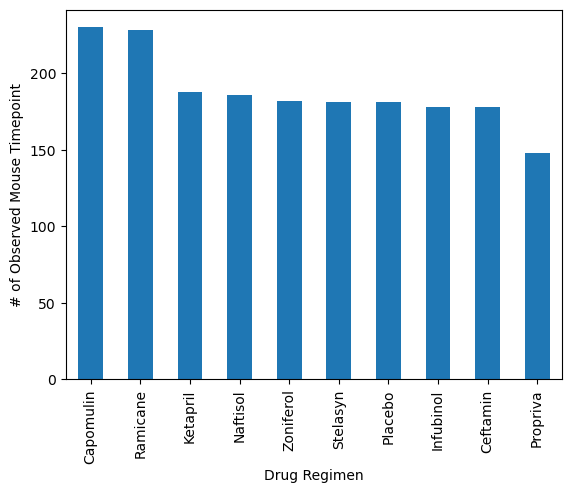

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = df_combine_clean["Drug Regimen"].value_counts()

plot = mice_count.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")

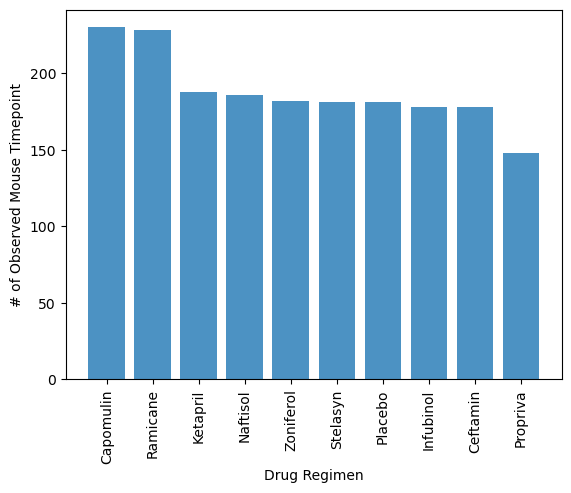

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoint")
plt.xticks(rotation="vertical")

plt.show()

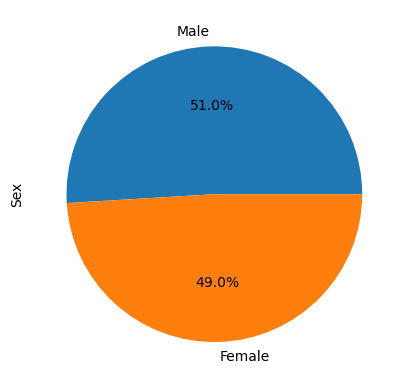

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = df_combine_clean["Sex"].value_counts()
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

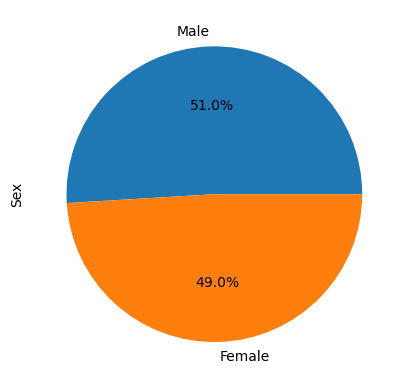

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Drugs=df_combine["Drug Regimen"]
mask=[]
for drug in Drugs:
    if drug=='Capomulin'or drug=='Ramicane'or drug=='Infubinol'or drug=='Ceftamin':
        mark='keep'
        mask.append(mark)
    else:
        mark='drop'
        mask.append(mark)
df_combine["DrugMask"] = mask

df_combine_clean=df_combine.loc[df_combine["DrugMask"]=="keep"]

last = df_combine_clean.groupby('Mouse ID').max()['Timepoint']
last_vol = pd.DataFrame(last)
last_merge = pd.merge(last_vol, df_combine_clean, on=("Mouse ID","Timepoint"),how="left")
last_merge_reduce=last_merge[["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]]
last_merge_reduce.head()

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3)
0,a203,45,Infubinol,67.973419
1,a251,45,Infubinol,65.525743
2,a275,45,Ceftamin,62.999356
3,a411,45,Ramicane,38.407618
4,a444,45,Ramicane,43.047543


In [17]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
Capomulin_last_merge_reduce=last_merge_reduce.loc[last_merge_reduce["Drug Regimen"]=="Capomulin",:]
Capomulin_tumors = Capomulin_last_merge_reduce["Tumor Volume (mm3)"]
Capomulin_quartiles =Capomulin_tumors.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

print("# Capomulin")
print(f"The lower quartile of Capomulin tumors: {Capomulin_lowerq}")
print(f"The upper quartile of Capomulin tumors: {Capomulin_upperq}")
print(f"The interquartile range of Capomulin tumors: {Capomulin_iqr}")
print(f"The median of Capomulin tumors: {Capomulin_quartiles[0.5]} ")

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

print(f"Values below {Capomulin_lower_bound} could be outliers.")
print(f"Values above {Capomulin_upper_bound} could be outliers.")

print("---------------------------------------------------------------------------------------")

Ramicane_last_merge_reduce=last_merge_reduce.loc[last_merge_reduce["Drug Regimen"]=="Ramicane",:]
Ramicane_tumors = Ramicane_last_merge_reduce["Tumor Volume (mm3)"]
Ramicane_quartiles =Ramicane_tumors.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

print("# Ramicane")
print(f"The lower quartile of Ramicane tumors: {Ramicane_lowerq}")
print(f"The upper quartile of Ramicane tumors: {Ramicane_upperq}")
print(f"The interquartile range of Ramicane tumors: {Ramicane_iqr}")
print(f"The median of Ramicane tumors: {Ramicane_quartiles[0.5]} ")

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

print(f"Values below {Ramicane_lower_bound} could be outliers.")
print(f"Values above {Ramicane_upper_bound} could be outliers.")

print("---------------------------------------------------------------------------------------")

Infubinol_last_merge_reduce=last_merge_reduce.loc[last_merge_reduce["Drug Regimen"]=="Infubinol",:]
Infubinol_tumors = Infubinol_last_merge_reduce["Tumor Volume (mm3)"]
Infubinol_quartiles =Infubinol_tumors.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

print("# Infubinol")
print(f"The lower quartile of Infubinol tumors: {Infubinol_lowerq}")
print(f"The upper quartile of Infubinol tumors: {Infubinol_upperq}")
print(f"The interquartile range of Infubinol tumors: {Infubinol_iqr}")
print(f"The median of Infubinol tumors: {Infubinol_quartiles[0.5]} ")

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

print(f"Values below {Infubinol_lower_bound} could be outliers.")
print(f"Values above {Infubinol_upper_bound} could be outliers.")

print("---------------------------------------------------------------------------------------")

Ceftamin_last_merge_reduce=last_merge_reduce.loc[last_merge_reduce["Drug Regimen"]=="Ceftamin",:]
Ceftamin_tumors = Ceftamin_last_merge_reduce["Tumor Volume (mm3)"]
Ceftamin_quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

print("# Ceftamin")
print(f"The lower quartile of Ceftamin tumors: {Ceftamin_lowerq}")
print(f"The upper quartile of Ceftamin tumors: {Ceftamin_upperq}")
print(f"The interquartile range of Ceftamin tumors: {Ceftamin_iqr}")
print(f"The median of Ceftamin tumors: {Ceftamin_quartiles[0.5]} ")

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

print(f"Values below {Ceftamin_lower_bound} could be outliers.")
print(f"Values above {Ceftamin_upper_bound} could be outliers.")

    # Determine outliers using upper and lower bounds
Capomulin_Outliers=Capomulin_tumors.loc[(Capomulin_last_merge_reduce["Tumor Volume (mm3)"]<Capomulin_lower_bound) | 
                                        (Capomulin_last_merge_reduce["Tumor Volume (mm3)"]>Capomulin_upper_bound)]
Ramicane_Outliers=Ramicane_tumors.loc[(Ramicane_last_merge_reduce["Tumor Volume (mm3)"]<Ramicane_lower_bound) | 
                                      (Ramicane_last_merge_reduce["Tumor Volume (mm3)"]>Ramicane_upper_bound)]
Infubinol_Outliers=Infubinol_tumors.loc[(Infubinol_last_merge_reduce["Tumor Volume (mm3)"]<Infubinol_lower_bound) | 
                                      (Infubinol_last_merge_reduce["Tumor Volume (mm3)"]>Infubinol_upper_bound)]
Ceftamin_Outliers=Ceftamin_tumors.loc[(Ceftamin_last_merge_reduce["Tumor Volume (mm3)"]<Ceftamin_lower_bound) | 
                                      (Ceftamin_last_merge_reduce["Tumor Volume (mm3)"]>Ceftamin_upper_bound)]

print("---------------------------------------------------------------------------------------")
print(f"Capomulin's potential outliers:{Capomulin_Outliers}")
print(f"Ramicane's potential outliers: {Ramicane_Outliers}")
print(f"Infubinol's potential outliers:{Infubinol_Outliers}")
print(f"Ceftamin's potential outliers:{Ceftamin_Outliers}")

# Capomulin
The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
---------------------------------------------------------------------------------------
# Ramicane
The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
---------------------------------------------------------------------------------------
# Infubinol
The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of 

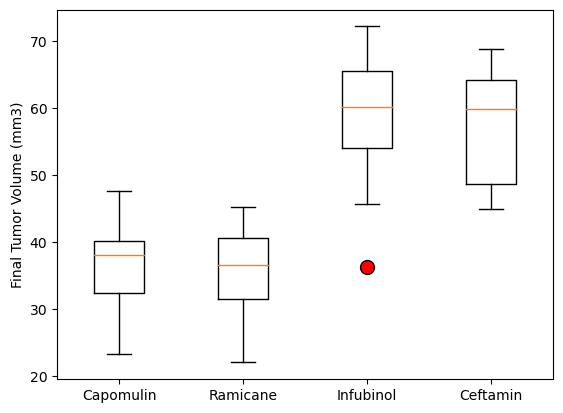

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol=[Capomulin_tumors,Ramicane_tumors,Infubinol_tumors,Ceftamin_tumors]

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=treatment_list, widths = 0.4, vert=True, 
            flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

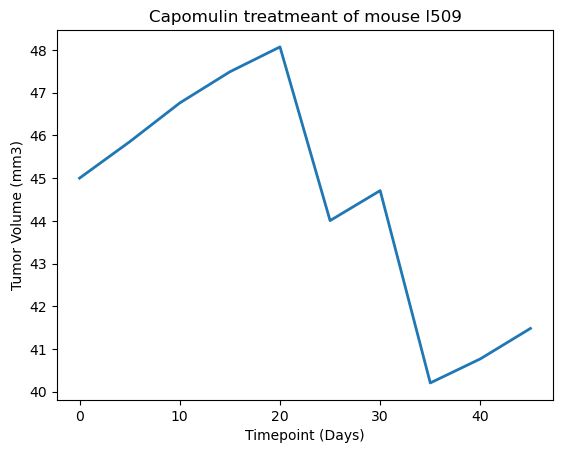

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df_combine_clean = df_combine_clean.loc[df_combine_clean["Drug Regimen"]=="Capomulin",:]
forline_df = Capomulin_df_combine_clean.loc[Capomulin_df_combine_clean["Mouse ID"] == "l509",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


C:\Users\Jacky Zhang\AppData\Local\Temp\ipykernel_10664\887903204.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol = Capomulin_df_combine_clean.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

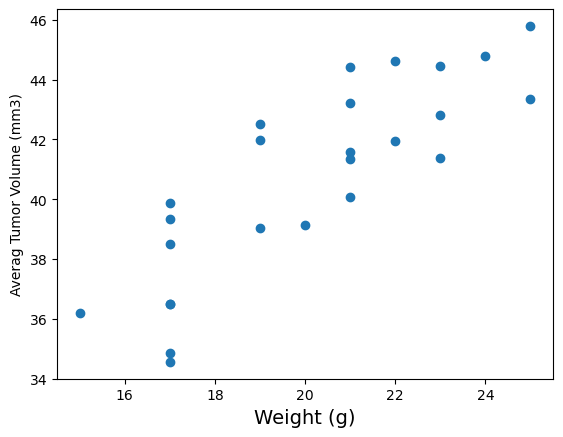

In [28]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = Capomulin_df_combine_clean.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


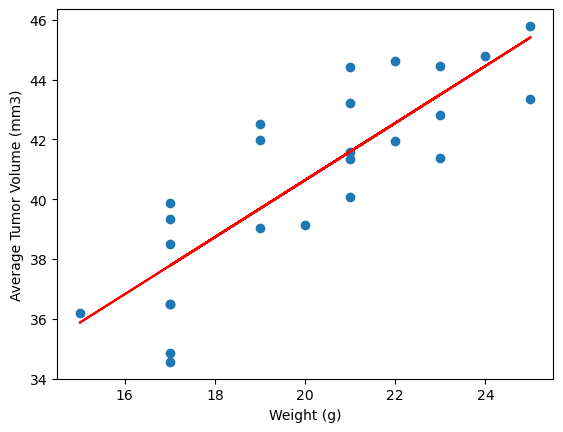

In [29]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept,rvalue, pvalue, stderr)= linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
plt.plot(avg_capm_vol["Weight (g)"], regress_values,color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()